# Data analysis on 2+1D CDT universes

Author: Seda den Boer

Date: 04/04/2024

In [2]:
# Load packages
import sys
sys.path.append('..')
from typing import Dict, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import pickle
import networkx as nx
import math
from matplotlib.tri import Triangulation
from classes.universe import Universe
from classes.helper_functions.helpers import get_spatial_neighbours, get_vertices_in_slice

## $k_3$

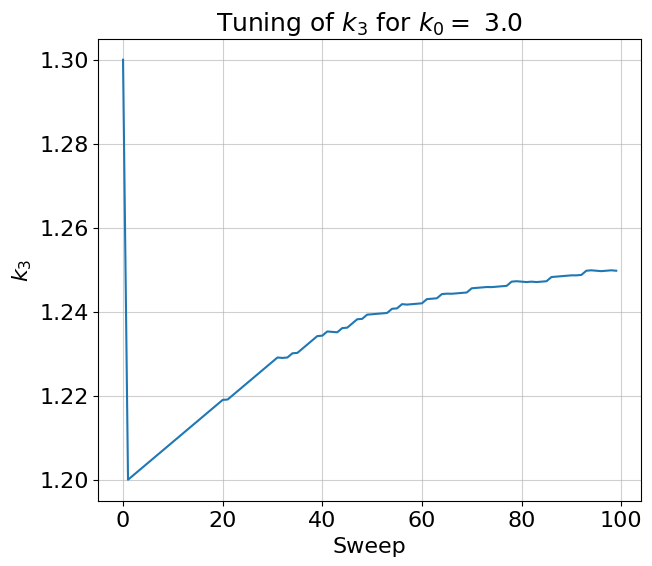

In [54]:
k0 = 3.0
filepath = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_k3_values.npy'
k3_values = np.load(filepath)

# Plot the k3 values
plt.figure(figsize=(7, 6))
plt.plot(k3_values)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)

### Critical $k_3$

In [4]:
# Load file
filepath = '/home/seda2102/epic/CDT/src/2+1/experiments/measurements/critical_k3_T3_trgtvN31=10000.pkl.gz'

with gzip.open(filepath, 'rb') as file:
    k3_data = pickle.load(file)

print(k3_data)

[1.0417799999999955, 1.1760799999999827, 1.3237199999999882, 1.4782399999999793, 1.6480799999999842, 1.8284799999999846, 2.0621400000000256, 2.3117000000000187]


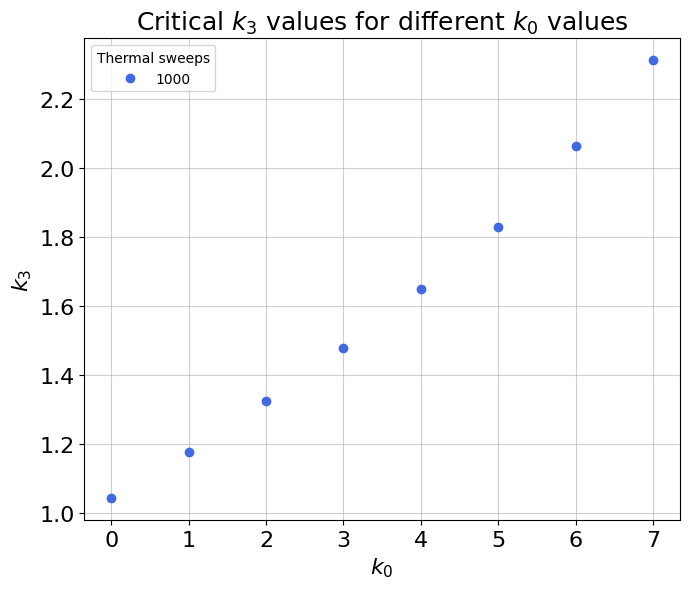

In [5]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.plot(k0_values, k3_data, 'o', color='royalblue', label='1000')  # Plot markers
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()

## Acceptance ratios

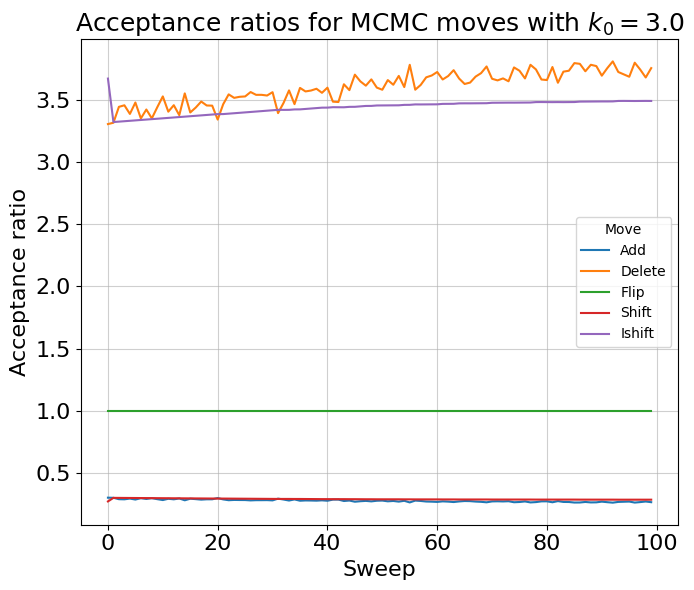

In [55]:
# Load file
k0 = 3.0
filepath = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_acceptance_ratios.npy'
acceptance_ratios = np.load(filepath).T

# Plot acceptance ratios
plt.figure(figsize=(7, 6))
plt.plot(acceptance_ratios[0], label='Add')
plt.plot(acceptance_ratios[1], label='Delete')
plt.plot(acceptance_ratios[2], label='Flip')
plt.plot(acceptance_ratios[3], label='Shift')
plt.plot(acceptance_ratios[4], label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## Succes rates

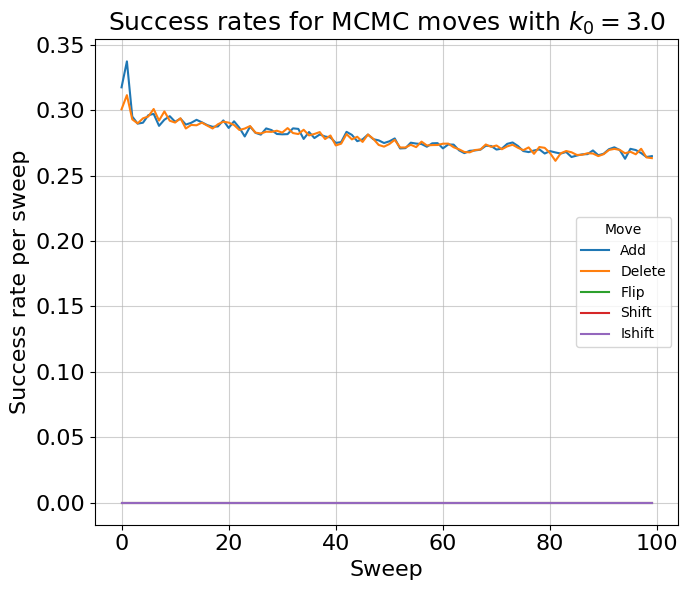

In [56]:
# Load files
k0 = 3.0
filepath_successes = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_successes.npy'
filepath_fails = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_fails.npy'
successes = np.load(filepath_successes).T
fails = np.load(filepath_fails).T

# # Get the success rate 
success_rate = successes / (successes + fails)

# Plot success rate
plt.figure(figsize=(7, 6))
plt.plot(success_rate[0], label='Add')
plt.plot(success_rate[1], label='Delete')
plt.plot(success_rate[2], label='Flip')
plt.plot(success_rate[3], label='Shift')
plt.plot(success_rate[4], label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate per sweep', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## $<N_{22}/N_{31}>$

### Over time

[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18]
[  18 1390 3436 3606 3604 3482 3596 3388 3474 3348 3462 3566 3368 3424
 3286 3520 3278 3316 3366 3300 3278 3092 3272 3366 3306 3298 3282 3312
 3260 3240 3212 3230 2966 3088 3230 3052 3236 3176 3166 3166 3100 3156
 2976 2974 3178 3092 3262 3168 3100 3168 3056 3030 3136 3082 3178 3034
 3276 2982 3038 3120 3138 3174 3072 3108 3170 3058 2996 3012 3076 3112
 3182 3028 3008 3028 2994 3146 3108 3022 3168 3098 2986 2982 3126 2952
 3076 3084 3164 3136 3054 3122 3106 3000 3082 3152 3018 2990 2966 3120
 3044 2956 3060]


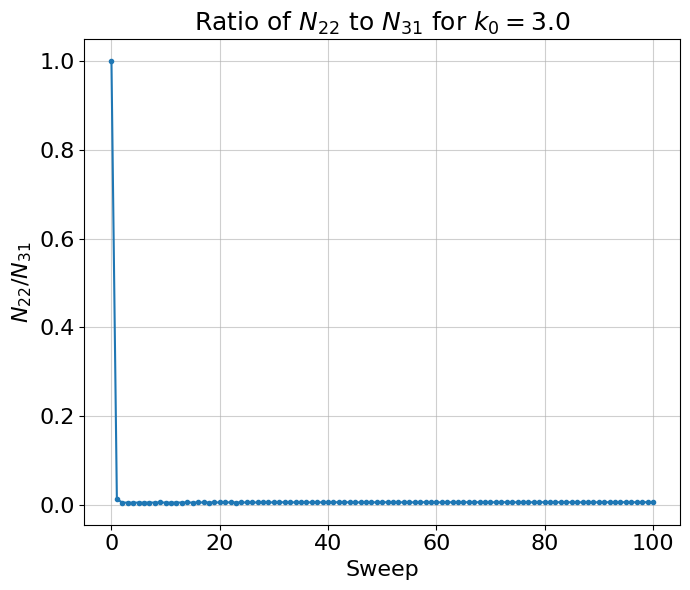

In [57]:
# Load files
k0 = 3.0
filepath_n22 = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_n_tetras_22.npy'
filepath_n31 = f'T3/measurements/k0={k0}/T3_k0={k0}_tswps=100_swps=0_kstps=300000_chain=0_n_tetras_31.npy'
n_tetras_22 = np.load(filepath_n22)
n_tetras_31 = np.load(filepath_n31)
print(n_tetras_22)
print(n_tetras_31)
# # Get the ratio of n22 to n31
ratio_n22_n31 = n_tetras_22 / n_tetras_31

# Plot ratio of n22 to n31
plt.figure(figsize=(7, 6))
plt.plot(ratio_n22_n31, '.-')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22} / N_{31}$', fontsize=16)
plt.title('Ratio of $N_{22}$ to $N_{31}$ for ' + f'$k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()

### Phase transition

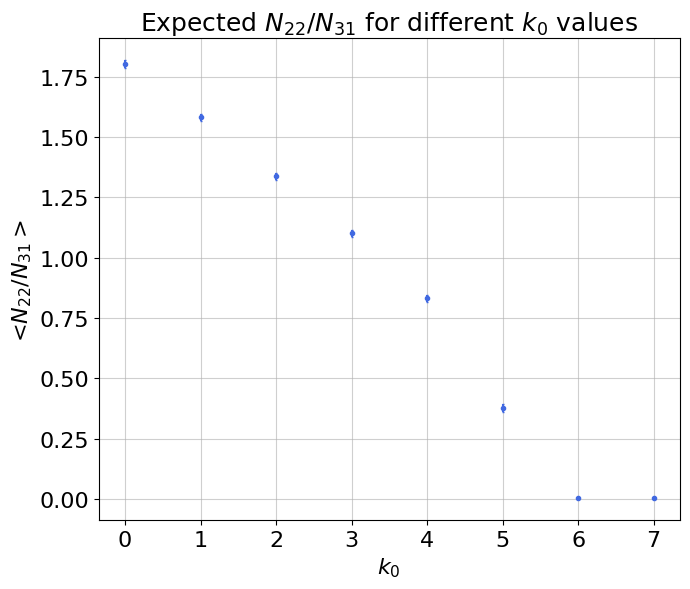

In [9]:
n22_n31_0 = np.array(data[0]['total_22_tetrahedra']) / 10000
n22_n31_1 = np.array(data[1]['total_22_tetrahedra']) / 10000
n22_n31_2 = np.array(data[2]['total_22_tetrahedra']) / 10000
n22_n31_3 = np.array(data[3]['total_22_tetrahedra']) / 10000
n22_n31_4 = np.array(data[4]['total_22_tetrahedra']) / 10000
n22_n31_5 = np.array(data[5]['total_22_tetrahedra']) / 10000
n22_n31_6 = np.array(data[6]['total_22_tetrahedra']) / 10000
n22_n31_7 = np.array(data[7]['total_22_tetrahedra']) / 10000
 
y = [n22_n31_0.mean(), n22_n31_1.mean(), n22_n31_2.mean(), n22_n31_3.mean(), n22_n31_4.mean(), n22_n31_5.mean(), n22_n31_6.mean(), n22_n31_7.mean()]
yerr = [n22_n31_0.std(), n22_n31_1.std(), n22_n31_2.std(), n22_n31_3.std(), n22_n31_4.std(), n22_n31_5.std(), n22_n31_6.std(), n22_n31_7.std()]

# Plot the mean n22/n31 against k0 with the variance 
plt.figure(figsize=(7, 6))
plt.errorbar(k0_values, y, yerr=yerr, fmt='.', color='royalblue', capsize=1)
plt.title('Expected $N_{22} / N_{31}$ for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('<$N_{22} / N_{31}>$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()

## Volume

### Spatial volume

In [10]:
# # Load file
# filepath = 'measurements/test_k0=1_slice_sizes.npy'
# slice_sizes = np.load(filepath)

# print(slice_sizes)

k0 = 0
slice_sizes = data[k0]['slice_sizes']
print(slice_sizes)
# Plot slice sizes
plt.figure(figsize=(7, 6))



[{0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

### Total tetrahedron volume

In [11]:
# filepath = 'measurements/test_k0=1_slab_sizes.npy'
# slab_sizes = np.load(filepath)

# print(slab_sizes)

## Curvature

[[3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3], [53, 10, 32, 59, 13, 21, 61, 40, 17, 17, 11, 5, 6, 29, 18, 4, 17, 8, 11, 56, 20, 10, 22, 27, 14, 5, 5, 17, 34, 15, 15, 9, 3, 6, 13, 12, 20, 11, 16, 18, 7, 15, 25, 14, 11, 9, 19, 9, 19, 6, 9, 4, 14, 13, 11, 11, 7, 35, 6, 6, 7, 5, 23, 4, 4, 8, 10, 7, 5, 3, 3, 4, 13, 5, 12, 3, 13, 11, 11, 4, 12, 8, 4, 12, 16, 4, 9, 12, 6, 3, 3, 4, 13, 10, 9, 7, 27, 5, 5, 4, 9, 3, 15, 4, 6, 3, 9, 13, 5, 3, 7, 13, 4, 5, 9, 12, 6, 3, 12, 4, 5, 19, 3, 11, 7, 9, 6, 3, 3, 7, 9, 19, 8, 4, 13, 8, 3, 3, 13, 4, 5, 4, 3, 4, 8, 9, 4, 7, 14, 4, 6, 17, 8, 5, 17, 3, 8, 3, 3, 3, 8, 4, 5, 4, 4, 6, 4, 6, 3, 3, 3, 6, 3, 11, 3, 6, 5, 6, 9, 4, 4, 3, 4, 9, 8, 9, 11, 4, 8, 11, 6, 11, 5, 8, 3, 4, 6, 5, 6, 3, 3, 3, 4, 4, 3, 6, 8, 3, 7, 5, 26, 6, 5, 7, 7, 11, 4, 5, 7, 9, 6, 3, 3, 3, 4, 11, 3, 7, 4, 4, 6, 6, 6, 10, 4, 7, 3, 3, 3, 7, 5, 10, 4, 4, 3, 3, 3, 3, 4, 3, 7, 6, 3, 4, 9, 7, 3, 10, 7, 7, 5, 6, 7, 8, 9, 5, 3, 3, 3, 12, 9, 6, 3, 3, 3, 6, 9, 12, 3, 6, 

Text(0, 0.5, 'Curvature')

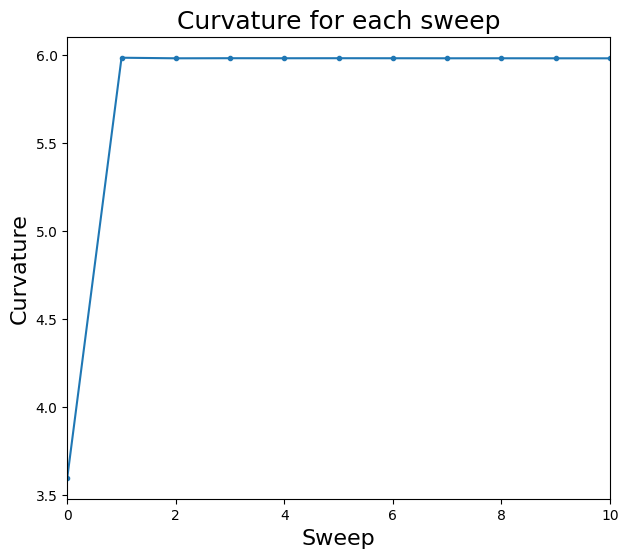

In [93]:
import numpy as np
filepath_curvature = 'T3/measurements/k0=3.0/T3_k0=3.0_tswps=100_swps=0_kstps=300000_chain=0_curvature.npy'
filepath_curvature = 'T5/measurements/k0=8.0/outfile_k0=8.0_tswps=1000_swps=0_kstps=500000_chain=0_curvature.npy'
curvature = np.load(filepath_curvature, allow_pickle=True)

# print(curvature)

# Add values together 
total_curvature = []
for data in curvature:
    added_values = []
    for key, value in data.items():
        # Add the values together in 1 list
        added_values += value

    total_curvature.append(added_values)

print(total_curvature)

# Plot the curvature average 
plt.figure(figsize=(7, 6))
y = [np.mean(data) for data in total_curvature]
# yerr = [np.std(data) for data in total_curvature]
# print(y)
# Plot curvature against sweeps
plt.plot(y, '.-')
plt.xlim(0, 10)
plt.title('Curvature for each sweep', fontsize=18)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Curvature', fontsize=16)


## Spectral dimension

In [12]:
def plot_spectral_dimension_per_timeslice(infile: str, diffusion_times: List[int]):
    pass

def plot_spectral_dimension(infile: str, diffusion_times: List[int]):
    pass

## Visualisation

### Network timeslices

In [13]:
def generate_timeslice_graphs(universe: Universe, save: bool, filename: str) -> Dict[int, nx.Graph]:
    T = universe.n_slices
    vertices_in_slice = get_vertices_in_slice(universe)
    spatial_neighbours = get_spatial_neighbours(universe)
    graphs = {t: None for t in range(T)}

    # Generate the graph
    for t, vertex_ids in vertices_in_slice.items():
        G = nx.Graph()

        for vertex_id in vertex_ids:
            vertex = universe.vertex_pool.get(vertex_id)
            G.add_node(
                vertex_id,
                time=vertex.time,
                tetrahedron=vertex.tetra.ID,
                degree=len(universe.vertex_neighbours[vertex.ID]),
                cnum=vertex.cnum,
                scnum=vertex.scnum,
            )
        
        for vertex_id in vertex_ids:
            for spatial_neighbour_id in spatial_neighbours[vertex_id]:
                G.add_edge(vertex_id, spatial_neighbour_id)

        pos = nx.planar_layout(G)
        print(pos)
        for node,(x,y) in pos.items():
            G.nodes[node]['x'] = float(x)
            G.nodes[node]['y'] = float(y)

        graphs[t] = G

        if nx.check_planarity(G):
            print(f'The spatial slice {t} is planar')
        else:
            print(f'The spatial slice {t} is not planar')
            
        if save:
            nx.write_gexf(G, f'{filename}_t={t}.gexf')
    
    return graphs

def visualise_timeslices(graphs: Dict[int, nx.Graph]):
    # Plot each graph
    for t in range(len(graphs)):
        G = graphs[t]

        if G:
            plt.figure()
            pos = nx.spring_layout(G)
            nx.draw(G, pos, node_size=1, node_color="blue")
            plt.title(f"Time slice {t}")
            plt.axis("equal")

In [14]:
# universe_0 = Universe(geometry_infilename=filenames[0])
# graphs = generate_timeslice_graphs(universe_0, True, 'networks/graph_k0=0')

### Triangulation timeslices

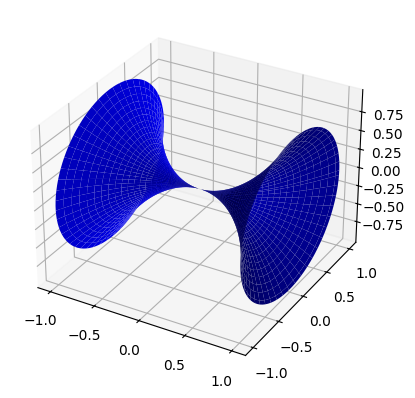

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the 1D function
def f(x):
    return x**2

# Step 2: Generate points along the function
x = np.linspace(-1, 1, 100)
y = f(x)

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')

[[   6.    6.    6.    6.    6.]
 [1884.  210. 1116. 2626. 2578.]
 [1606.  188.  924. 2112. 2000.]
 ...
 [1176.  174.  764. 1598. 1474.]
 [1180.  166.  760. 1596. 1472.]
 [1172.  168.  766. 1602. 1472.]]
1172.0
168.0
766.0
1472.0


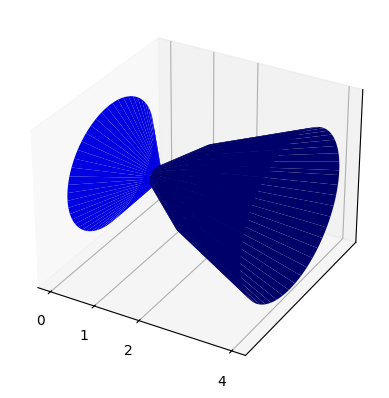

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

k0 = 8.0
filepath = f'T5/measurements/k0={k0}/outfile_k0={k0}_tswps=1000_swps=0_kstps=500000_chain=0_slice_sizes.npy'
slice_sizes = np.load(filepath)
print(slice_sizes)

# Step 1: Define the 1D function
def f(x):
    print(slice_sizes[-1][x])
    return slice_sizes[-1][x]

# Step 2: Generate points along the function
x = [0, 1, 2, 4]
y = [f(x) for x in x]

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')
# Dont show y and z axis
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticks(x)

[]

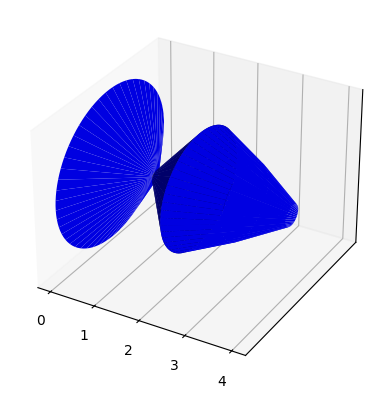

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

def generate_random_data(length, total):
    data = []
    remaining = total
    for _ in range(length - 1):
        value = random.uniform(0, remaining)
        data.append(value)
        remaining -= value
    data.append(remaining)
    random.shuffle(data)
    return data

# Step 2: Generate points along the function
x = [0, 1, 2, 3, 4]
length = 5
total = 5000
y = generate_random_data(length, total)

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')
# Dont show y and z axis
ax.set_yticks([])
ax.set_zticks([])